In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd


In [5]:
def findMiddle(input_list):
    middle = float(len(input_list))/2
    if middle % 2 != 0:
        return input_list[int(middle - .5)]
    else:
        return input_list[int(middle)]


# BT Classic

In [6]:
acl_header = 16
acl_crc = 16
paket_header = 72+18
slot_1 = 1
slot_1_payload = 27*8
slot_1_paket = slot_1_payload + paket_header + acl_header + acl_crc
slot_3 = 3
slot_3_payload = 183 * 8
slot_3_paket = slot_3_payload + paket_header + acl_header + acl_crc
slot_5 = 5
slot_5_payload = 2712
slot_5_paket = slot_5_payload + paket_header + acl_header + acl_crc

max_throughput_one_direction = 723*(10**3)
max_throughput_back_direction = 57*(10**3)
max_throughput = 780*(10**3)


In [7]:
# Daten stammen aus dem Buch From GSM To LTE-Advanced Pro and 5G
# assumtion: 1 Ack = 1 slot paket (338 bit)
ack_size = 338

data = {'Slot Anzahl': [1,3,5], 'Payload in Bytes': [27,183,339]}
dataframe = pd.DataFrame.from_dict(data)
dataframe.insert(len(dataframe.columns),'Pakete pro Sekunde',dataframe['Slot Anzahl'].apply(lambda x:math.ceil(1600/x)))
dataframe.insert(len(dataframe.columns),'Payload in Bit',dataframe['Payload in Bytes'].apply(lambda x:x*8))
dataframe.insert(len(dataframe.columns),'Paketgröße in Bit',dataframe['Payload in Bit'].apply(lambda x:x+acl_crc+acl_header+paket_header))
dataframe['Daten (Bit/s)'] = dataframe['Payload in Bit'] * dataframe['Pakete pro Sekunde']
dataframe['Paket (Bit/s)'] = dataframe['Paketgröße in Bit'] * dataframe['Pakete pro Sekunde']
raw_dataframe = dataframe.copy()

# Dataframe mit ACK
dataframe['Ges. Slots ratio'] = dataframe['Slot Anzahl']/(dataframe['Slot Anzahl']+1)
dataframe['Ges. Pakete'] = (dataframe['Ges. Slots ratio'] * dataframe['Pakete pro Sekunde']).apply(lambda x:math.floor(x))
dataframe['Ges. Slots'] = dataframe['Ges. Pakete'] * dataframe['Slot Anzahl']
dataframe['Empf. Ack Slots'] = 1600 - dataframe['Ges. Slots']
dataframe['Empf. Ack'] = dataframe['Empf. Ack Slots']
dataframe = dataframe.drop(['Pakete pro Sekunde','Payload in Bytes','Daten (Bit/s)','Paket (Bit/s)','Ges. Slots ratio'],axis=1)
dataframe_with_ack = dataframe.copy()

# Dataframe mit ACK und Durchsatz
dataframe['Ges. Paket (Bit/s)'] = dataframe['Ges. Pakete'] * dataframe['Paketgröße in Bit']
dataframe['Empf. Paket (Bit/s)'] = dataframe['Empf. Ack'] * ack_size
dataframe['Ges. Daten (Bit/s)'] = dataframe['Ges. Pakete'] * dataframe['Payload in Bit']
dataframe['Empf. Daten (Bit/s)'] = dataframe['Empf. Ack'] * (ack_size-(acl_crc+acl_header+paket_header))
dataframe = dataframe.drop(['Ges. Slots','Empf. Ack Slots'],axis=1)
dataframe_with_ack_throughput = dataframe.copy().drop(['Payload in Bit','Paketgröße in Bit'],axis=1)
#print(dataframe)

In [8]:
raw_dataframe_latex_str = raw_dataframe.to_latex(caption="Übersicht über ACL Pakete mit 1,3 und 5 Slots",label="tbl:overviewAclPakets",index=False)
raw_dataframe

,Slot Anzahl,Payload in Bytes,Pakete pro Sekunde,Payload in Bit,Paketgröße in Bit,Daten (Bit/s),Paket (Bit/s)
0,1,27,1600,216,338,345600,540800
1,3,183,534,1464,1586,781776,846924
2,5,339,320,2712,2834,867840,906880


In [9]:
dataframe_with_ack_latex_str = dataframe_with_ack.to_latex(caption="Übersicht einer Übertragung von ACL Paketen mit Ack",label="tbl:overviewAclPaketswithAcks",index=False)
dataframe_with_ack

,Slot Anzahl,Payload in Bit,Paketgröße in Bit,Ges. Pakete,Ges. Slots,Empf. Ack Slots,Empf. Ack
0,1,216,338,800,800,800,800
1,3,1464,1586,400,1200,400,400
2,5,2712,2834,266,1330,270,270


In [10]:
dataframe_with_ack_throughput_latex_str = dataframe_with_ack_throughput.to_latex(caption="Übersicht des Throughput einer Übertragung von ACL Paketen",label="tbl:overviewAclPaketsThroughput",index=False)
dataframe_with_ack_throughput

,Slot Anzahl,Ges. Pakete,Empf. Ack,Ges. Paket (Bit/s),Empf. Paket (Bit/s),Ges. Daten (Bit/s),Empf. Daten (Bit/s)
0,1,800,800,270400,270400,172800,172800
1,3,400,400,634400,135200,585600,86400
2,5,266,270,753844,91260,721392,58320


In [11]:
def toTabularX(latex_str):
    return latex_str.replace("\end{tabular}","\end{tabularx}").replace("\\begin{tabular}","\\begin{tabularx}{\linewidth}").replace("rrrrrrr","XXXXXXX").replace("rrrrrrrr","XXXXXXXX")
print(toTabularX(raw_dataframe_latex_str))
print(toTabularX(dataframe_with_ack_latex_str))
print(toTabularX(dataframe_with_ack_throughput_latex_str))

\begin{table}
\centering
\caption{Übersicht über ACL Pakete mit 1,3 und 5 Slots}
\label{tbl:overviewAclPakets}
\begin{tabularx}{\linewidth}{XXXXXXX}
\toprule
 Slot Anzahl &  Payload in Bytes &  Pakete pro Sekunde &  Payload in Bit &  Paketgröße in Bit &  Daten (Bit/s) &  Paket (Bit/s) \\
\midrule
           1 &                27 &                1600 &             216 &                338 &         345600 &         540800 \\
           3 &               183 &                 534 &            1464 &               1586 &         781776 &         846924 \\
           5 &               339 &                 320 &            2712 &               2834 &         867840 &         906880 \\
\bottomrule
\end{tabularx}
\end{table}

\begin{table}
\centering
\caption{Übersicht einer Übertragung von ACL Paketen mit Ack}
\label{tbl:overviewAclPaketswithAcks}
\begin{tabularx}{\linewidth}{XXXXXXX}
\toprule
 Slot Anzahl &  Payload in Bit &  Paketgröße in Bit &  Ges. Pakete &  Ges. Slots &  Empf. Ack Slo

In [12]:
slot_1_range = range(0,math.ceil(1_000_000/(slot_1*625)))
slot_3_range = range(0,math.ceil(1_000_000/(slot_3*625)))
slot_5_range = range(0,math.ceil(1_000_000/(slot_5*625)))
slot_1_pakets = [slot_1_paket * paket_amount for paket_amount in slot_1_range]
slot_3_pakets = [slot_3_paket * paket_amount for paket_amount in slot_3_range]
slot_5_pakets = [slot_5_paket * paket_amount for paket_amount in slot_5_range]
print(slot_1_range)
print(slot_3_range)
print(slot_5_range)

range(0, 1600)
range(0, 534)
range(0, 320)


Using 1 slot packets the overal best Bitrate would be 540462 Bit/s
Using 3 slot packets the overal best Bitrate would be 845338 Bit/s
Using 5 slot packets the overal best Bitrate would be 904046 Bit/s


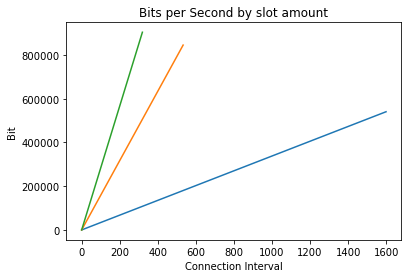

In [13]:
plt.xlabel("Connection Interval")
plt.ylabel("Bit")
plt.title("Bits per Second by slot amount")
plt.plot(slot_1_range,slot_1_pakets)
plt.plot(slot_3_range,slot_3_pakets)
plt.plot(slot_5_range,slot_5_pakets)
print("Using 1 slot packets the overal best Bitrate would be %s Bit/s"%max(slot_1_pakets))
print("Using 3 slot packets the overal best Bitrate would be %s Bit/s"%max(slot_3_pakets))
print("Using 5 slot packets the overal best Bitrate would be %s Bit/s"%max(slot_5_pakets))

In [14]:
slot_5_1_pakets = [sum(x) for x in zip(slot_5_pakets,slot_1_pakets[:len(slot_5_pakets)])]
slot_3_1_pakets = [sum(x) for x in zip(slot_3_pakets,slot_1_pakets[:len(slot_3_pakets)])]
slot_1_1_pakets = [sum(x) for x in zip(slot_1_pakets,slot_1_pakets[:len(slot_1_pakets)])]

 1. Pakete in 1600 Slots
 2. Pakete um auf Datenübertragung aus dem Buch zu kommen

Text(0, 0.5, 'Durchsatz in kBit')

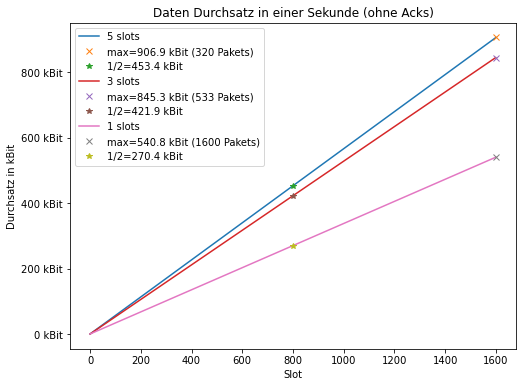

In [15]:
import matplotlib.ticker as mticker  

def fun(pos,index):
    return "%d kBit"%((pos/1_000 ))

plt.figure(figsize=(8,6))
for a,b in zip([5,3,1],[slot_5_paket,slot_3_paket,slot_1_paket]):
    pakets = [i/a * b for i in range(0,1601,a)]
    x = range(0,1601,a)
    plt.plot(x,pakets,label="%d slots"%a)
    middle_index = findMiddle(x)
    middle_value = findMiddle(pakets)
    plt.plot(max(x),max(pakets),'x',label="max=%.1f kBit (%d Pakets)"%(max(pakets)/1_000,max(x)/a))
    plt.plot(middle_index,middle_value,'*',label="1/2=%.1f kBit"%(middle_value/1_000))
    

plt.title("Daten Durchsatz in einer Sekunde (ohne Acks)")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(fun))
plt.legend() 
plt.xlabel("Slot")
plt.ylabel("Durchsatz in kBit")

Text(0, 0.5, 'Durchsatz in kBit')

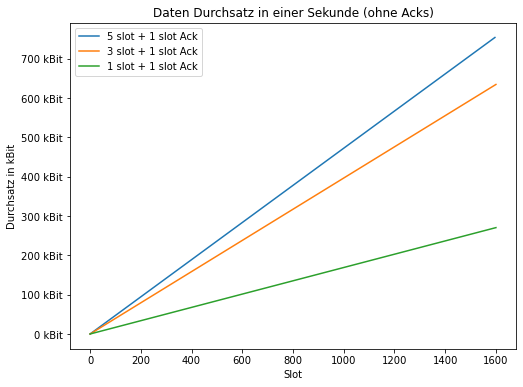

In [16]:

plt.figure(figsize=(8,6))
for a,b in zip([5,3,1],[slot_5_paket,slot_3_paket,slot_1_paket]):
    # this will be 5- 3- 1- slot pakets (in 5,3,1 intervalls)
    pakets = [i/a * b for i in range(0,1601,a)]

    # this will be 6- 4- 2- slot pakets in (6,4,2 intervalls)
    x = range(0,1601,a+1)
    plt.plot(x,pakets[:len(x)],label="%d slot + 1 slot Ack"%a)

    #plt.plot(x,pakets,label="%d slots"%a)
    #middle_index = findMiddle(x)
    #middle_value = findMiddle(pakets)
    #plt.plot(max(x),max(pakets),'x',label="max=%.1f kBit (%d Pakets)"%(max(pakets)/1_000,max(x)/a))
    #plt.plot(middle_index,middle_value,'*',label="1/2=%.1f kBit"%(middle_value/1_000))
    

plt.title("Daten Durchsatz in einer Sekunde (ohne Acks)")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(fun))
plt.legend() 
plt.xlabel("Slot")
plt.ylabel("Durchsatz in kBit")

Maximum of slot 5 pakets in 780000 Bit possible:
with Ack: 266 Pakets = 1596 Slots
	Sent Data: 753844 Bit
	Ack Data: 89908 Bit
	Datarate: 843752
without Ack: 275 Pakets
	Sent Data: 779350 Bit
	left Data for Acks: 650 Bit

Maximum of slot 3 pakets in 780000 Bit possible:
with Ack: 383 Pakets = 1532 Slots
	Sent Data: 607438 Bit
	Ack Data: 129454 Bit
	Datarate: 736892
without Ack: 491 Pakets
	Sent Data: 778726 Bit
	left Data for Acks: 1274 Bit

Maximum of slot 1 pakets in 780000 Bit possible:
with Ack: 784 Pakets = 1568 Slots
	Sent Data: 264992 Bit
	Ack Data: 264992 Bit
	Datarate: 529984
without Ack: 1599 Pakets
	Sent Data: 540462 Bit
	left Data for Acks: 239538 Bit


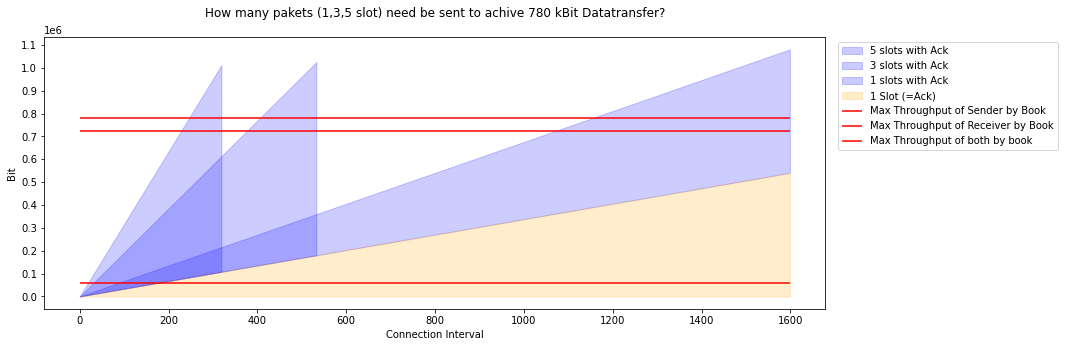

In [17]:
plt.figure(figsize=(14,5))
ax = plt.axes()
plt.fill_between(slot_5_range,slot_5_1_pakets,slot_1_pakets[:len(slot_5_range)],label="5 slots with Ack",color="blue",alpha=0.2)
#plt.fill_between(slot_5_range,slot_5_pakets,label="5 slots without Ack",color="orange",alpha=0.2)

plt.fill_between(slot_3_range,slot_3_1_pakets,slot_1_pakets[:len(slot_3_range)],label="3 slots with Ack",color="blue",alpha=0.2)
#plt.fill_between(slot_3_range,slot_3_pakets,label="3 slots without Ack",color="orange",alpha=0.2)

plt.fill_between(slot_1_range,slot_1_1_pakets,slot_1_pakets,label="1 slots with Ack",color="blue",alpha=0.2)
plt.fill_between(slot_1_range,slot_1_pakets,label="1 Slot (=Ack)",color="orange",alpha=0.2)

plt.hlines(max_throughput_one_direction,0,max(slot_1_range),color="red",label="Max Throughput of Sender by Book")
plt.hlines(max_throughput_back_direction,0,max(slot_1_range),color="red",label="Max Throughput of Receiver by Book")
plt.hlines(max_throughput,0,max(slot_1_range),color="red",label="Max Throughput of both by book")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xlabel("Connection Interval")
plt.ylabel("Bit")
plt.title("How many pakets (1,3,5 slot) need be sent to achive 780 kBit Datatransfer?",pad=20.0)
loc = plticker.MultipleLocator(base=100000.0) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)

print("Maximum of slot 5 pakets in %s Bit possible:"%max_throughput)
max_slot_5_pakets_with_ack = max([slot_nr for slot_nr in slot_5_range if slot_nr*(slot_1+slot_5) < 1600 & slot_nr*(slot_5_paket+slot_1_paket) <= max_throughput])
max_slot_5_pakets_without_ack = max([slot_nr for slot_nr in slot_5_range if slot_nr*slot_5_paket<= max_throughput])
print("with Ack: %s Pakets = %s Slots"%(max_slot_5_pakets_with_ack,(slot_5+slot_1) * max_slot_5_pakets_with_ack))
print("\tSent Data:",max_slot_5_pakets_with_ack*slot_5_paket, "Bit")
print("\tAck Data:",max_slot_5_pakets_with_ack*slot_1_paket, "Bit")
print("\tDatarate:", max_slot_5_pakets_with_ack*(slot_5_paket+slot_1_paket))
print("without Ack:",max_slot_5_pakets_without_ack,"Pakets")
print("\tSent Data:",max_slot_5_pakets_without_ack*slot_5_paket, "Bit")
print("\tleft Data for Acks:",max_throughput-max_slot_5_pakets_without_ack*slot_5_paket, "Bit")
print()

print("Maximum of slot 3 pakets in %s Bit possible:"%max_throughput)
max_slot_3_pakets_with_ack = max([slot_nr for slot_nr in slot_3_range if slot_nr*(slot_1+slot_3) < 1600 & slot_nr*(slot_3_paket+slot_1_paket) <= max_throughput])
max_slot_3_pakets_without_ack = max([slot_nr for slot_nr in slot_3_range if slot_nr*slot_3_paket<= max_throughput])
print("with Ack: %s Pakets = %s Slots"%(max_slot_3_pakets_with_ack,(slot_3+slot_1) * max_slot_3_pakets_with_ack))
print("\tSent Data:",max_slot_3_pakets_with_ack*slot_3_paket, "Bit")
print("\tAck Data:",max_slot_3_pakets_with_ack*slot_1_paket, "Bit")
print("\tDatarate:", max_slot_3_pakets_with_ack*(slot_3_paket+slot_1_paket))
print("without Ack:",max_slot_3_pakets_without_ack,"Pakets")
print("\tSent Data:",max_slot_3_pakets_without_ack*slot_3_paket, "Bit")
print("\tleft Data for Acks:",max_throughput-max_slot_3_pakets_without_ack*slot_3_paket, "Bit")
print()

print("Maximum of slot 1 pakets in %s Bit possible:"%max_throughput)
max_slot_1_pakets_with_ack = max([slot_nr for slot_nr in slot_1_range if slot_nr*(slot_1+slot_1) <= 1600 & slot_nr*(slot_1_paket+slot_1_paket) <= max_throughput])
max_slot_1_pakets_without_ack = max([slot_nr for slot_nr in slot_1_range if slot_nr*slot_1_paket<= max_throughput])
print("with Ack: %s Pakets = %s Slots"%(max_slot_1_pakets_with_ack,(slot_1+slot_1) * max_slot_1_pakets_with_ack))
print("\tSent Data:",max_slot_1_pakets_with_ack*slot_1_paket, "Bit")
print("\tAck Data:",max_slot_1_pakets_with_ack*slot_1_paket, "Bit")
print("\tDatarate:", max_slot_1_pakets_with_ack*(slot_1_paket+slot_1_paket))
print("without Ack:",max_slot_1_pakets_without_ack,"Pakets")
print("\tSent Data:",max_slot_1_pakets_without_ack*slot_1_paket, "Bit")
print("\tleft Data for Acks:",max_throughput-max_slot_1_pakets_without_ack*slot_1_paket, "Bit")


# BT Low Energy

In [199]:
time_factor = 1250
min_interval = 6     # 7,5 ms
max_interval = 3200  # 4000 ms
connection_intervals = [min_interval,16,32,64,128,256,512,1024,2048,max_interval]
connection_intervals = [] + list(range(512,max_interval,512))
mtu_min = 23
mtu_max = 512
mtu_intervals = [mtu_min,32,64,128,256,512]
mtu_intervals = [mtu_min] + list(range(64,mtu_max,64))

groupbyMTU = False

In [200]:
def throughput(connection_interval,mtu,latency=0,minimum_intervals=2,inKByte=False):
    # (1 second / connection intervals) * paket size
    # (1_000_000 microseconds / x * 1250 microseconds) * y bytes
    intervals_to_complete_request = connection_interval * minimum_intervals + latency
    throughput = (1_000_000 / (intervals_to_complete_request*time_factor)) * mtu
    if inKByte:
        return throughput/1024
    return throughput



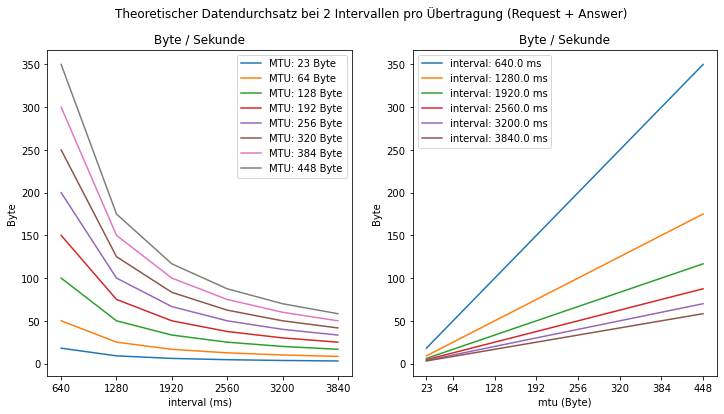

In [201]:
df = pd.DataFrame(columns=['interval (dez)','mtu (Byte)','interval (ms)','Byte / Second'])
for t in connection_intervals:
    for mtu in mtu_intervals:
        df = df.append(pd.DataFrame([[t,mtu,t*time_factor/1000,throughput(t,mtu,inKByte=False)]],columns=df.columns),ignore_index=True)

fig,axes = plt.subplots(1,2,figsize=(12,6))
fig.suptitle("Theoretischer Datendurchsatz bei 2 Intervallen pro Übertragung (Request + Answer)")
for title, group in df.groupby('mtu (Byte)'):
    ax = axes[0]
    ax.set_title("Byte / Sekunde")
    ax.set_xlabel("Interval in ms")
    ax.set_ylabel("Byte")
    group.plot("interval (ms)","Byte / Second",label="MTU: %s Byte"%title,ax=ax,xticks=[ci*time_factor/1000 for ci in connection_intervals])
for title, group in df.groupby('interval (ms)'):
    ax = axes[1]
    ax.set_title("Byte / Sekunde")
    ax.set_xlabel("MTU in Byte")
    ax.set_ylabel("Byte")
    ymean=group['Byte / Second'].mean()
    group.plot("mtu (Byte)","Byte / Second",label="interval: %s ms"%title,ax=ax,xticks=mtu_intervals)
    counter+=1



Aus diesen Grafiken geht hervor, dass der Datendurchsatz direkt Proportional von der Paketgröße abhängt und indirekt Proportional von dem gewählten Intervall.
Das sollte einem Entwickler vermitteln, je höher das Intervall gewählt ist, desto geringer ist der Datendurchsatz.

Gibt es einen Grund viele Daten, mit geringer Größe zu senden, sollte das Intervall gering gesetzt werden. Es spricht grundsätzlich nichts dagegen die MTU Größe auf den maximal möglichen Wert zu setzen, bei einer sehr großen MTU Größe und sehr kurzen Intervallen, kann es jedoch dazu kommen das der Speicher des Bluetooth Controllers schnell voll ist und die Pakete weiterhin verzögert werden. 